# The Sparks Foundation - Prediction using Decision Tree Algorithm
Task - Create the Decision Tree classifier and visualize it graphically.

Author - Rubal Bansal

### Import Libraries
Importing all libraries required

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

### The Data
Reading data in the Iris.csv file into a pandas dataframe.

In [2]:
data=pd.read_csv('Iris.csv',index_col=0)
print("Data imported")

data.head()

Data imported


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

* There are no NaN value present

### Input data visualization
Now let's visualize the the data above using seaborn library

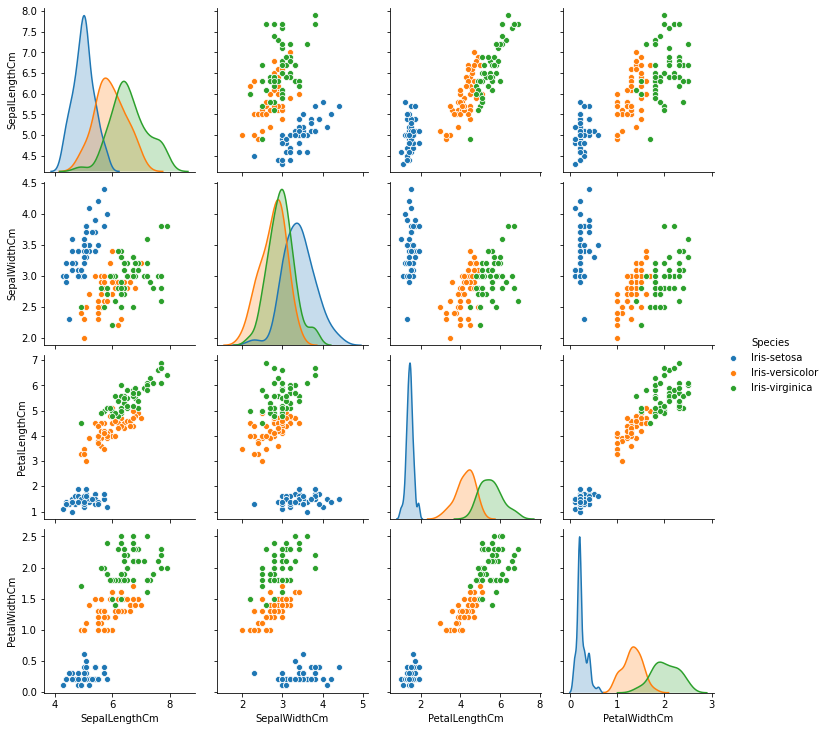

In [6]:
sns.pairplot(data, hue='Species')

* there is a high correlation between sepal length and sepal width which is easily teraceble.

### Scatter plot of data based on Sepal Length and Width features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

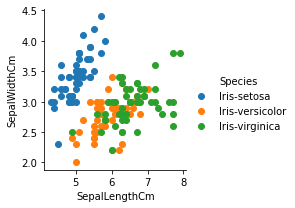

In [7]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show()

### The correlation matrix

In [8]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


* In next step, using heatmap to visulaize data

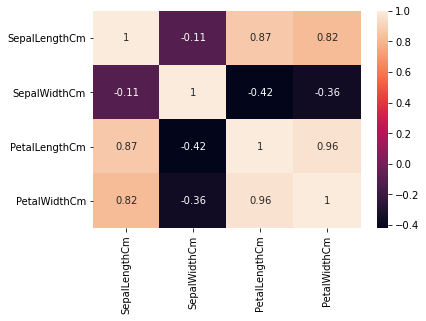

In [9]:
sns.heatmap(data.corr(), annot = True)

We observed that:
* Petal length is highly related to petal width.
* Sepal length is not related to sepal width.

### Data preprocessing

In [10]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 4)

In [11]:
#defingi the attributes and labels
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

(150, 5)

### Training the Model
We will now split the data into test and train.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


### Model Building

In [13]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

# Prediction on test data
y_pred=dtree.predict(X_test)

Decision Tree Classifier created!


### Evaluation the Model

In [14]:
# f1-Score
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
# Accuracy Score
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


* The accuracy is 1 or 100% since i took all the 4 features of the iris dataset.

In [16]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [17]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


## Visualize the decision tree

##### Text Representation of the graph

In [18]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: 2



##### Visual Representation of the graph

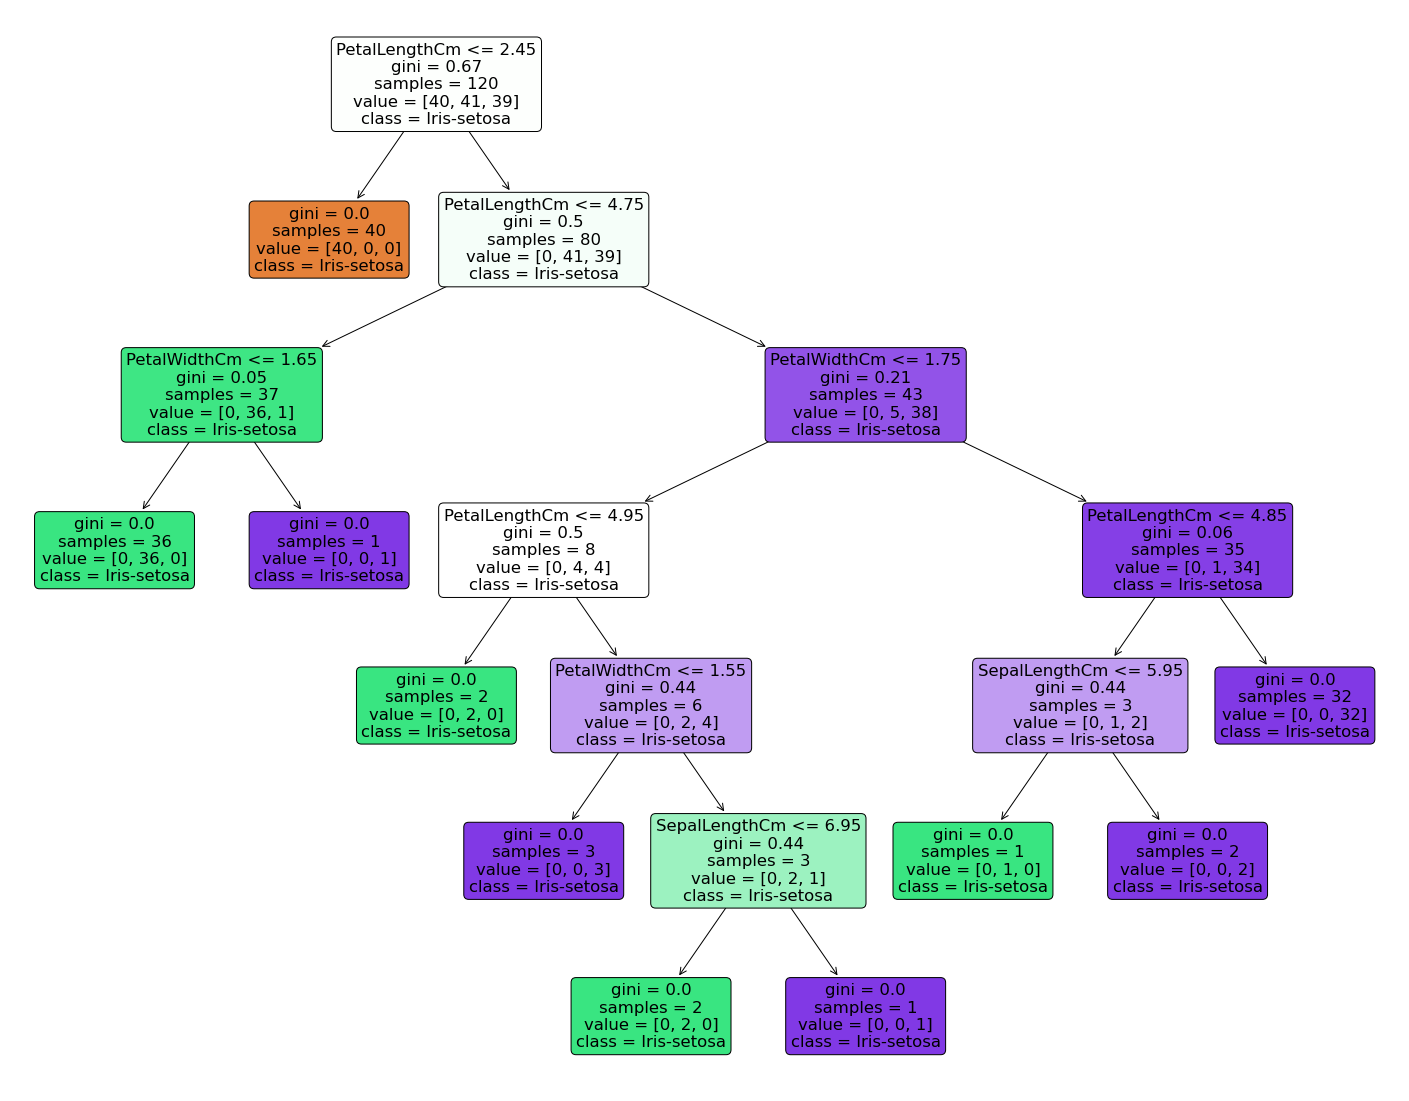

In [19]:
mt.figure(figsize=(25,20))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

* The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.

### Prediction On Randomly Created Data

In [20]:
new_data =  pd.DataFrame({'SepalLengthCm':[4.4,5.4,6.4,5.9,4.8],
                         'SepalWidthCm':[2.1,2.5,3.2,3.5,4.1],
                         'PetalLengthCm':[1.5,2.5,3.5,4.5,5.5],
                         'PetalWidthCm':[0.3,0.7,1.5,1.8,2.2]})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.4,2.1,1.5,0.3
1,5.4,2.5,2.5,0.7
2,6.4,3.2,3.5,1.5
3,5.9,3.5,4.5,1.8
4,4.8,4.1,5.5,2.2


In [21]:
new_predict = dtree.predict(new_data)

In [22]:
new_data['Predicted_Species'] = new_predict
new_data['Predicted_Species'] = new_data['Predicted_Species'].map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})
new_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Species
0,4.4,2.1,1.5,0.3,Iris-setosa
1,5.4,2.5,2.5,0.7,Iris-versicolor
2,6.4,3.2,3.5,1.5,Iris-versicolor
3,5.9,3.5,4.5,1.8,Iris-virginica
4,4.8,4.1,5.5,2.2,Iris-virginica
